In [1]:
#问题1的a、b
import json
import pandas as pd
import numpy as np
np.set_printoptions(threshold=1000)
pd.set_option('display.width',1000)

with open('hw4_data.json','r',encoding='utf-8') as file:
    data=json.load(file) #这是一个字典类型
length=len(data['nodes'])

pair=dict(data['nodes'])  
j=0
for name in pair:
    pair[name]=j
    j=j+1                       #建立姓名——序号对

pair_inverse={}            
for key,value in pair.items():
    pair_inverse[value]=key      #反转上述键值对，建立序号——姓名对

matrix=np.zeros((length,length),float)   #建立邻接矩阵数表
for edge in data['edges']:
    i=0
    for i in range(2):
        edge[i]=pair[edge[i]]   #将每条edge里的人名修改为对应的序号
    if edge[0]>edge[1]:
        edge[0],edge[1]=edge[1],edge[0]     #并且从小到大排列序号
    matrix[edge[0]][edge[1]]=edge[2]
    matrix[edge[1]][edge[0]]=edge[2]   #建立对称的邻接矩阵
df=pd.DataFrame(matrix)          #把数表格式化为表格
print("问题1a")
print(df)

print()
print("问题1b")
friends_list={}
for person in pair:
    friends_list[person]=[]    #[]里的是人名
for edge in data['edges']:
    friends_list[pair_inverse[edge[0]]].append(pair_inverse[edge[1]])
    friends_list[pair_inverse[edge[1]]].append(pair_inverse[edge[0]])
for key,value in friends_list.items():    #取键值对的方法
    print(f'{key}:{value}') 

问题1a
       0      1      2      3      4      5      6     7     8      9   ...    21    22    23    24    25    26    27    28    29    30
0    0.00  25.30  25.09   9.62   2.10   0.00   0.00  0.00  0.00   1.14  ...  0.00  4.25  4.50  0.00  0.00  3.11  7.39  3.61  0.00  0.00
1   25.30   0.00  24.84   6.40   0.97   0.00   0.00  0.00  0.00   0.00  ...  0.00  4.55  4.84  0.00  0.00  3.27  7.73  3.82  0.00  0.00
2   25.09  24.84   0.00  12.48   3.96   3.27   2.52  2.10  0.00   3.56  ...  0.00  4.66  4.97  0.00  0.00  3.32  7.63  3.90  1.00  2.10
3    9.62   6.40  12.48   0.00  11.87   9.15   7.73  6.96  6.85  15.28  ...  3.51  3.21  3.35  4.19  3.05  2.51  3.87  2.83  2.84  2.96
4    2.10   0.97   3.96  11.87   0.00   7.62   5.33  8.44  6.84   6.29  ...  1.26  0.84  0.85  1.34  1.20  0.78  0.88  0.81  1.09  0.89
5    0.00   0.00   3.27   9.15   7.62   0.00  10.82  6.14  3.51   8.19  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.65  3.69
6    0.00   0.00   2.52   7.73   5.33  10.8

In [2]:
#问题2的a、b、c
import json
import pandas as pd
import numpy as np
np.set_printoptions(threshold=1000)
pd.set_option('display.width',1000)

with open('hw4_data.json','r',encoding='utf-8') as file:
    data=json.load(file) #这是一个字典类型
length=len(data['nodes'])

pair=dict(data['nodes'])  
j=0
for name in pair:
    pair[name]=j
    j=j+1                       #建立姓名——序号对

pair_inverse={}            
for key,value in pair.items():
    pair_inverse[value]=key      #反转上述键值对，建立序号——姓名对

matrix=np.zeros((length,length),float)   #建立邻接矩阵数表
for edge in data['edges']:
    i=0
    for i in range(2):
        edge[i]=pair[edge[i]]   #将每条edge里的人名修改为对应的序号
    if edge[0]>edge[1]:
        edge[0],edge[1]=edge[1],edge[0]     #并且从小到大排列序号
    matrix[edge[0]][edge[1]]=edge[2]
    matrix[edge[1]][edge[0]]=edge[2]   #建立对称的邻接矩阵
df=pd.DataFrame(matrix)          #把数表格式化为表格

friends_list={}
for person in pair:
    friends_list[person]=[]    #[]里的是人名
for edge in data['edges']:
    friends_list[pair_inverse[edge[0]]].append(pair_inverse[edge[1]])
    friends_list[pair_inverse[edge[1]]].append(pair_inverse[edge[0]])
for key,value in friends_list.items():    #取键值对的方法
    pass   

#########################以上是通用的两种关系表示
friends_number={}
for key,value in friends_list.items():
    friends_number[key]=len(value)   #根据friends_list里的朋友人数建立新字典
friends_number2=dict(friends_number)  #这里把friends_number备份，以便后用
print("问题2a")
for i in range(5):
    max_key=max(friends_number,key=friends_number.get)    #返回朋友最多的人的名字
    print(f'{max_key}有{friends_number[max_key]}个朋友')
    friends_number.pop(max_key)           #把这个最多朋友的人踢掉，继续循环直到5次

print()
print("问题2b")
influence=dict(data['nodes'])      #根据data['nodes']建立新字典
for i in range(5):
    max_key=max(influence,key=influence.get)   #返回影响力最大的人的名字
    print(f'{max_key}的影响力为{influence[max_key]}')
    influence.pop(max_key)      #把这个影响力最大的人踢掉，继续循环直到5次

print()
print("问题2c")
overall=dict(data['nodes'])        #根据data['nodes']建立新字典
for key,value in overall.items():
    overall[key]=0.5*overall[key]+0.5*friends_number2[key]    #加权函数，用到了朋友人数的备份字典
max_key=max(overall,key=overall.get)        #返回综合影响力最大的人的名字
print(f'{max_key}的综合影响力为{overall[max_key]}，是影响力最大的')

问题2a
tyn1998有30个朋友
frank-zsy有30个朋友
pomelo-nwu有24个朋友
andyhuang18有23个朋友
wj23027有23个朋友

问题2b
Yanyan-Wang的影响力为50.95
Aarebecca的影响力为23.82
pomelo-nwu的影响力为22.36
tyn1998的影响力为16.64
frank-zsy的影响力为15.8

问题2c
Yanyan-Wang的综合影响力为32.475，是影响力最大的


In [3]:
#问题3的a、b
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
np.set_printoptions(threshold=1000)
pd.set_option('display.width',1000)

with open('hw4_data.json','r',encoding='utf-8') as file:
    data=json.load(file) #这是一个字典类型
length=len(data['nodes'])

pair=dict(data['nodes'])  
j=0
for name in pair:
    pair[name]=j
    j=j+1                       #建立姓名——序号对

pair_inverse={}            
for key,value in pair.items():
    pair_inverse[value]=key      #反转上述键值对，建立序号——姓名对

matrix=np.zeros((length,length),float)   #建立邻接矩阵数表
for edge in data['edges']:
    i=0
    for i in range(2):
        edge[i]=pair[edge[i]]   #将每条edge里的人名修改为对应的序号
    if edge[0]>edge[1]:
        edge[0],edge[1]=edge[1],edge[0]     #并且从小到大排列序号
    matrix[edge[0]][edge[1]]=edge[2]
    matrix[edge[1]][edge[0]]=edge[2]   #建立对称的邻接矩阵
df=pd.DataFrame(matrix)          #把数表格式化为表格

friends_list={}
for person in pair:
    friends_list[person]=[]    #[]里的是人名
for edge in data['edges']:
    friends_list[pair_inverse[edge[0]]].append(pair_inverse[edge[1]])
    friends_list[pair_inverse[edge[1]]].append(pair_inverse[edge[0]])
for key,value in friends_list.items():    #取键值对的方法
    pass   

#########################以上是通用的两种关系表示
fri1=set()
for name in friends_list['Yanyan-Wang']:
    fri1=fri1|set(friends_list[name])          #把Yanyan-Wang朋友的朋友姓名全并入一个集合
nfri=fri1-set(friends_list['Yanyan-Wang'])-set(['Yanyan-Wang'])    #把这个集合中Yanyan-Wang的朋友剔除
nfri_dict={}
for name in nfri:
    nfri_dict[name]=0                #把Yanyan-Wang潜在朋友的共同朋友数量置零
for key,value in nfri_dict.items():
    for name in friends_list[key]:
        if name in friends_list['Yanyan-Wang']:
            nfri_dict[key]=nfri_dict[key]+1    #对共同朋友数量进行计数
max_key=max(nfri_dict,key=nfri_dict.get)    #返回共同朋友人数最多的人

print("问题3a")
print(f'{max_key}与Yanyan-Wang有{nfri_dict[max_key]}个共同的朋友，是最多的，值得推荐')

print()
print("问题3b")
G=nx.Graph()
for name in pair:    
    G.add_node(name)
for edge in data['edges']:
    G.add_edge(pair_inverse[edge[0]],pair_inverse[edge[1]],weight=100-edge[2])   #权重高代表距离近
for name in pair:       #这里将修改pair
    pair[name]=nx.shortest_path_length(G,source='Yanyan-Wang',target=name,weight='weight')
for i in range(5):
    max_key=max(pair,key=pair.get)   
    print(f'{max_key}与Yanyan-Wang的连接强度高，值得推荐')
    pair.pop(max_key)  
    

问题3a
lhbvvvvv与Yanyan-Wang有6个共同的朋友，是最多的，值得推荐

问题3b
kunal8411与Yanyan-Wang的连接强度高，值得推荐
Vlad116与Yanyan-Wang的连接强度高，值得推荐
stealth-bombeer与Yanyan-Wang的连接强度高，值得推荐
pranavshuklaa与Yanyan-Wang的连接强度高，值得推荐
wxharry与Yanyan-Wang的连接强度高，值得推荐



问题4a


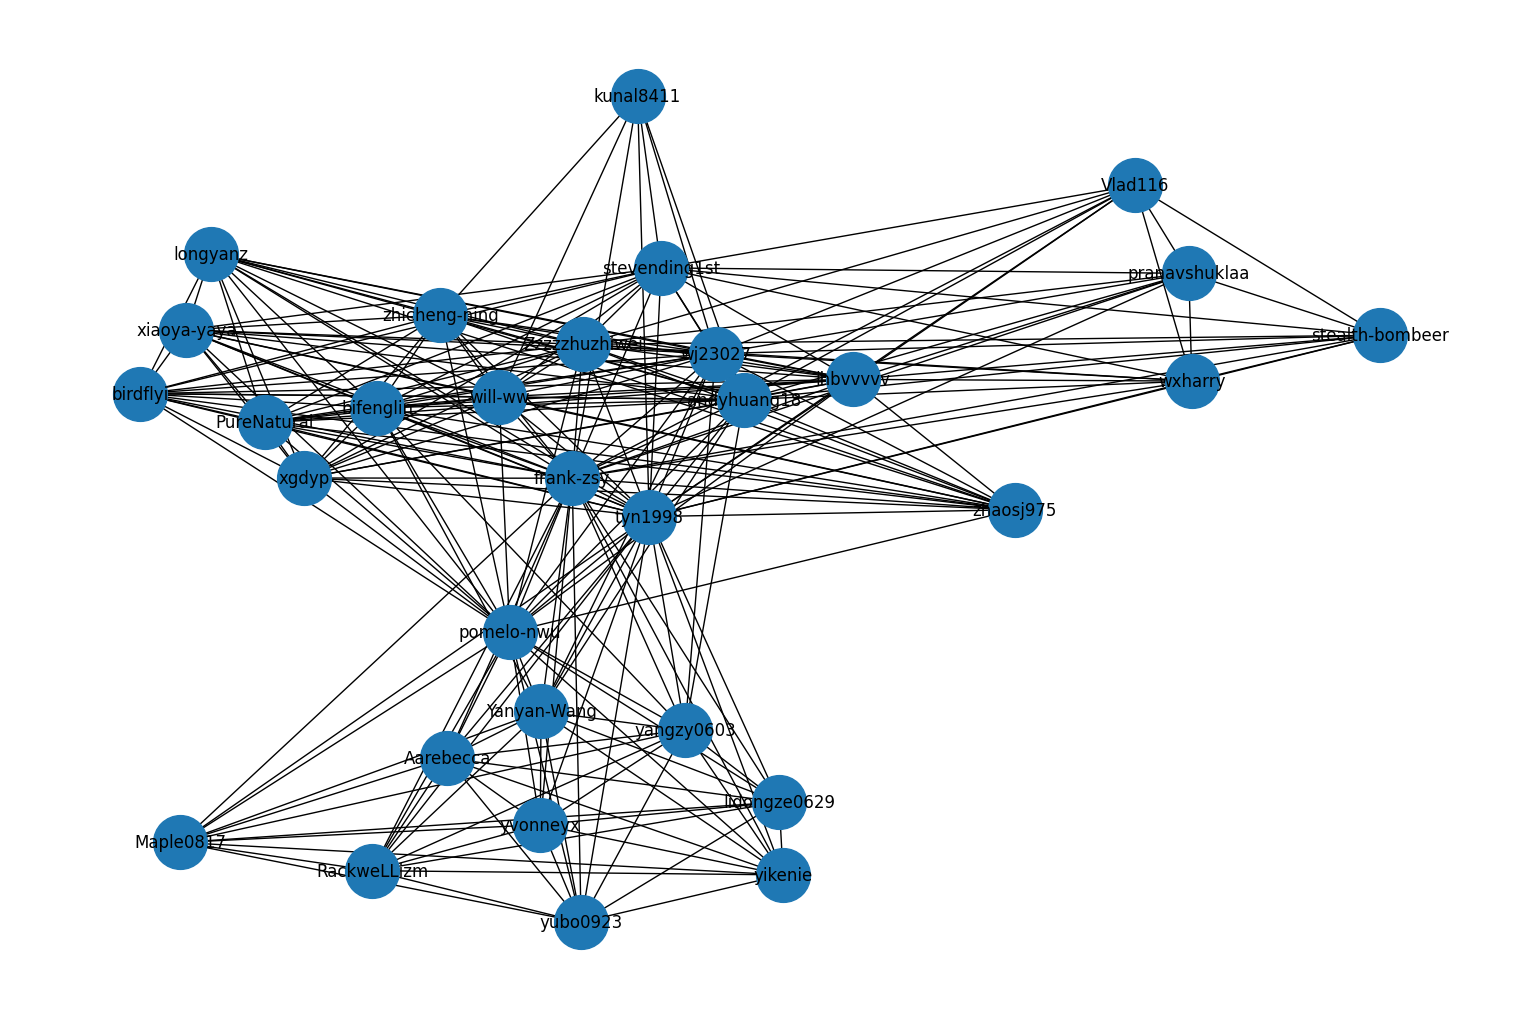


问题4b


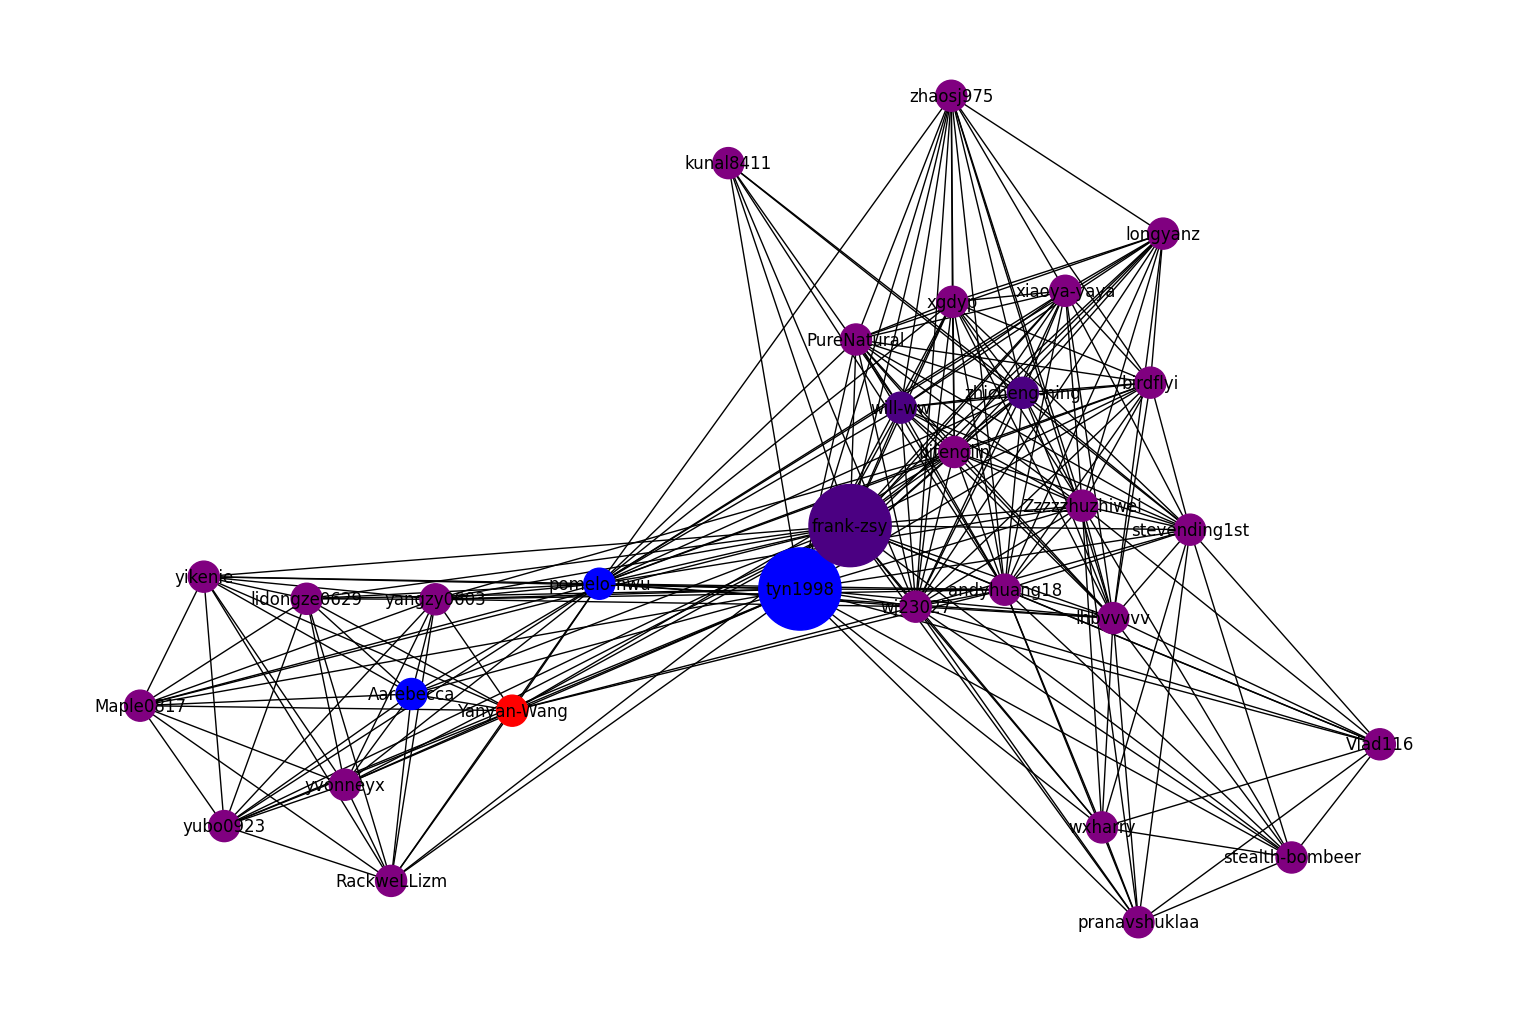

由此可见，综合看颜色与度数，Yanyan-Wang是最具影响力的人


In [4]:
#问题4的a、b
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
np.set_printoptions(threshold=1000)
pd.set_option('display.width',1000)

with open('hw4_data.json','r',encoding='utf-8') as file:
    data=json.load(file) #这是一个字典类型
length=len(data['nodes'])

pair=dict(data['nodes'])  
j=0
for name in pair:
    pair[name]=j
    j=j+1                       #建立姓名——序号对

pair_inverse={}            
for key,value in pair.items():
    pair_inverse[value]=key      #反转上述键值对，建立序号——姓名对

matrix=np.zeros((length,length),float)   #建立邻接矩阵数表
for edge in data['edges']:
    i=0
    for i in range(2):
        edge[i]=pair[edge[i]]   #将每条edge里的人名修改为对应的序号
    if edge[0]>edge[1]:
        edge[0],edge[1]=edge[1],edge[0]     #并且从小到大排列序号
    matrix[edge[0]][edge[1]]=edge[2]
    matrix[edge[1]][edge[0]]=edge[2]   #建立对称的邻接矩阵
df=pd.DataFrame(matrix)          #把数表格式化为表格

friends_list={}
for person in pair:
    friends_list[person]=[]    #[]里的是人名
for edge in data['edges']:
    friends_list[pair_inverse[edge[0]]].append(pair_inverse[edge[1]])
    friends_list[pair_inverse[edge[1]]].append(pair_inverse[edge[0]])
for key,value in friends_list.items():    #取键值对的方法
    pass   

#########################以上是通用的两种关系表示
print()
print("问题4a")
G=nx.Graph()
for name in pair:    #这里i是人名
    G.add_node(name)
for edge in data['edges']:
    G.add_edge(pair_inverse[edge[0]],pair_inverse[edge[1]],weight=edge[2])
plt.figure(figsize=(15,10))
nx.draw(G,with_labels=True,node_size=1500)
plt.show()

color=['purple','indigo','blue','green','yellow','orange','red']
print()
print("问题4b")
G=nx.Graph()
for name in pair:    #这里i是人名
    G.add_node(name)
    G.nodes[name]['size']=500+int(len(friends_list[name])/30)*3000
    G.nodes[name]['color']=color[int(data['nodes'][pair[name]][1]//8)]
for edge in data['edges']:
    G.add_edge(pair_inverse[edge[0]],pair_inverse[edge[1]],weight=edge[2])
plt.figure(figsize=(15,10))
node_sizes=[G.nodes[name]['size'] for name in pair]
node_colors=[G.nodes[name]['color'] for name in pair]
nx.draw(G,with_labels=True,node_size=node_sizes,node_color=node_colors)
plt.show()
print("由此可见，综合看颜色与度数，Yanyan-Wang是最具影响力的人")